## Nibabel intro
Nifti is neuroimaging informatics Technology Initiative. File format in neuroimaging (end in .nii or .nii.gz). Two pair of files (.hdr and .img). The compressed version of both files have the extension .gz.

Three dimensions: x,y and z and the fourth is time point, t. There are 3 more dimensions, 5th to 7th. 

The header(.hdr) structure contains metadata about the image, such as dimensions, slice time and time.

### Nibabel image
1. the 'image data array' is 3D or 4D array of image data.
2. 'affine array' tells the position of the 'image array data' in a reference space.
3. 'image metadata' the data of the data, usually describes the image and referred to '.hdr'

### Reading NifTi image with two step process
1. load()
2. get_data()

In [6]:
import nibabel as nib
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
### 1. Locate the data with .nii or .nii.gz file extension. ###
# Use load() to create Nibabel Image
Haxby_bold_sub1 = nib.load('D:/Haxby2001/subj1/bold.nii')

In [8]:
# From there, we can get the shape and dimension of the data.
Haxby_bold_sub1.shape

# for instance (x, y, z, time)

(40, 64, 64, 1452)

In [9]:
# There are some other information to get, use <Tab> in iPython to get more.
print('The (4,4) affine matrix of Haxby_bold_sub1 is')
Haxby_bold_sub1.affine

The (4,4) affine matrix of Haxby_bold_sub1 is


array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])

In [10]:
# header contains the 'image metadata'
Haxby_bold_sub1.header

In [11]:
### 2. To get actual image data, ###
# Run the get_data() that will load the image into memory
# This will return the image in standard Numpy ndarray
Haxby_sub1 = Haxby_bold_sub1.get_data()

### Viewing and manipulating the data
Once the memory is loaded, we can view and manipulate the data

In [12]:
# Defining a function using imshow and for loop for viewing the data
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="centre")

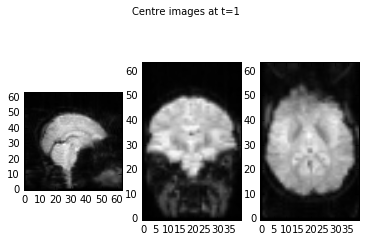

In [13]:
# To take a look at centre slices (20,32,32) of data at t=1
show_slices([Haxby_sub1[20, :, :, 1], Haxby_sub1[:, 32, :,1],Haxby_sub1[:, :, 32, 1]])
plt.suptitle("Centre images at t=1")

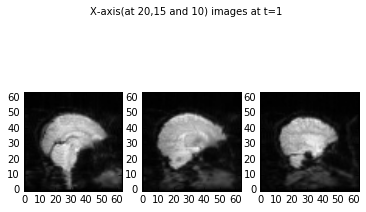

In [14]:
# To take a look at random slice of data at t=1 with varied x-dimension
show_slices([Haxby_sub1[20, :, :, 1], Haxby_sub1[15, :, :,1],Haxby_sub1[10, :, :, 1]])
plt.suptitle("X-axis(at 20,15 and 10) images at t=1")

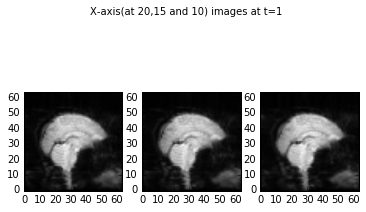

In [15]:
# To take a look at random slice of data at t=1 with varied x-dimension
show_slices([Haxby_sub1[20, :, :, 1], Haxby_sub1[20, :, :,10],Haxby_sub1[20, :, :, 100]])
plt.suptitle("X-axis images at t=1,10 and 100. Different time showing different task.")